# Learning Lab #1

#### In this lab, you will write several image processing routines, each described below.

These initial code blocks will import some of the routines that you'll need.

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


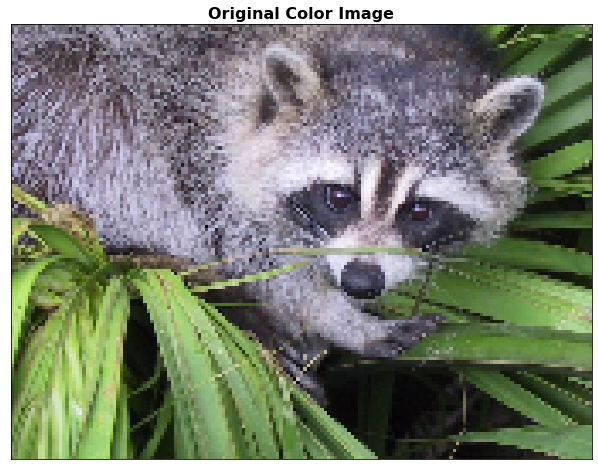

In [31]:
import numpy as np # this is so that you can see which functions come from the numpy library
import matplotlib.pyplot as plt # this is so that you can see which functions come from the pyplot library
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['axes.titlesize'] = '16'
plt.rcParams['axes.titleweight'] = 'bold'

import cv2
def just_title(title):
    a = plt.gca()
    a.set_title(title, fontdict={'fontsize': rcParams['axes.titlesize'],
                                 'fontweight' : rcParams['axes.titleweight'],
                                 'verticalalignment': 'baseline',
                                 'horizontalalignment': 'center'})
    a.set_xticks([])
    a.set_yticks([])

from scipy import misc
print()


big_face = misc.face()
s = 128.0/big_face.shape[0]
sm_face = cv2.resize(big_face,(0,0),fx=s,fy=s)

imshow(sm_face);
just_title('Original Color Image')

<br>
<br>

### Problem 1 - Gray Scale

Convert a color image to  gray scale: write a function that takes in  a  color  image  and  returns a  grayscale  image  using  the  following  formula  for  conversion:  

$Gray=  0.299 \cdot Red  +  0.587 \cdot Green  +  0.114 \cdot Blue$

In [32]:
def color2gray(image):
    
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2] # <- OpenCV reads them as b, g, r

    gray = 0.299*r + 0.587*g + 0.114*b

    return gray

<br>

Now test your code... 

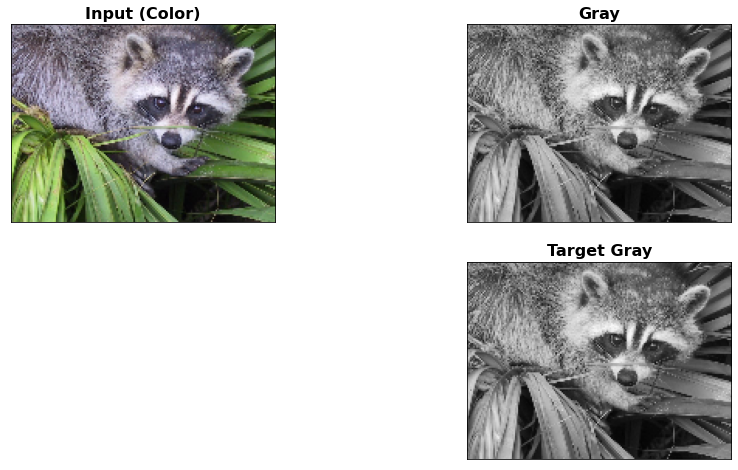

In [33]:
print()
gray_face = color2gray(sm_face)

plt.subplot(221)
plt.imshow(sm_face)
just_title('Input (Color)')

plt.subplot(222)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Gray')

target = cv2.imread('targets/gray.png')
plt.subplot(224)
plt.imshow(target,cmap="gray",vmin=0,vmax=255)
just_title('Target Gray')

plt.show()

<br>
<br>

### Problem 2 - Brightness Adjustment

For this problem, you should read in a  grayscale  image (e.g. from above) and  returns  the  corresponding  result  with  the  brightness  increased or decreased by  a  specified  amount (passed  as  a  parameter).

Be careful if you go below 0 or above 255.  What happens?

**Answer:** When the values go over 255 or below 0 then the image becomes completely black or white. 

In [34]:
def adjust_brightness(image, offset):
    
    adjustment = image + offset

    return adjustment

<br>

Now test your code... 

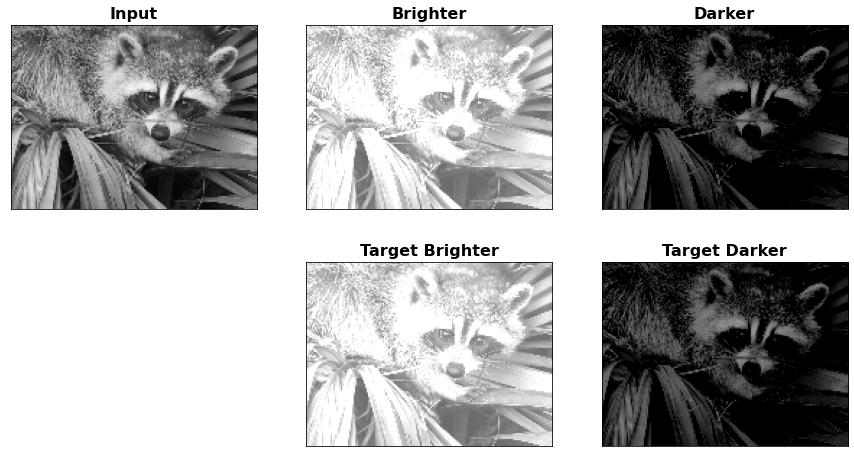

In [35]:
print()
bright_face_p100 = adjust_brightness(gray_face, 100)
bright_face_m100 = adjust_brightness(gray_face, -100)

plt.subplot(231)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Input');

plt.subplot(232)
plt.imshow(bright_face_p100,cmap="gray",vmin=0,vmax=255)
just_title('Brighter');

plt.subplot(233)
plt.imshow(bright_face_m100,cmap="gray",vmin=0,vmax=255)
just_title('Darker');


target_brighter = cv2.imread('targets/brighter.png')
target_darker   = cv2.imread('targets/darker.png')

plt.subplot(235)
plt.imshow(target_brighter,cmap="gray",vmin=0,vmax=255)
just_title('Target Brighter');

plt.subplot(236)
plt.imshow(target_darker,cmap="gray",vmin=0,vmax=255)
just_title('Target Darker');


<br>
<br>

### Problem 3 - Uniform Blurring

For this problem, you should take in  a  grayscale  image  and  return a  corresponding  image  that  has  been  uniformly blurred  (spatially  filtered)  using  3  x  3  uniform  averaging or "box" filter.

In [36]:
def blur_uniform(image, kwidth, kheight):
    
    kernel = np.ones([kwidth, kheight], dtype = int)
    kernel = kernel / (kwidth*kheight)
    
    padded_img = np.pad(image, pad_width=kwidth//2)
    
    m, n = image.shape
    result = np.zeros([m-1, n-1])
    
    for ii in range(1, m-1):
        for jj in range(1, n-1):
            
            result[ii, jj] = np.sum(padded_img[ii:ii+kwidth, jj:jj+kheight] * kernel)


    return result

def blur_uniform3x3(image):
    return blur_uniform(image,3,3)

<br>

Now test your code... 

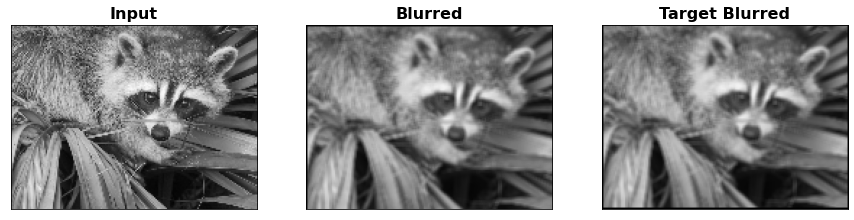

In [37]:
# print()

blur_face = blur_uniform3x3(gray_face)

plt.subplot(131)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Input');

plt.subplot(132)
plt.imshow(blur_face,cmap="gray",vmin=0,vmax=255)
just_title('Blurred')


target_blurred = cv2.imread('targets/ublur.png')
plt.subplot(133)
plt.imshow(target_blurred,cmap="gray",vmin=0,vmax=255)
just_title('Target Blurred')

<br>
<br>

### Problem 4 - Median Filter

This function should take a  grayscale  image and returns a corresponding image  that  has  been  median  filtered  using  a  3  x  3  neighborhood.  Each pixel from the original should be replaced by the median of the 9 values in a 3x3 neighborhood around that pixel.

In [38]:
def median_filter(image,width,height):
    
    padded_img = np.pad(image, pad_width=width//2)
    
    m, n = image.shape
    result = np.zeros([m-1, n-1])
    
    for ii in range(1, m-1):
        for jj in range(1, n-1):
            result[ii, jj] = np.median(padded_img[ii:ii+width, jj:jj+height])


    return result

<br>

Now test your code... 

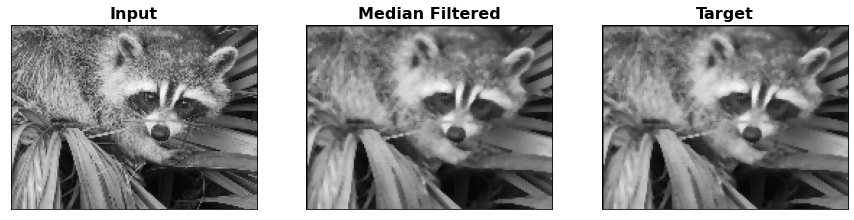

In [39]:
print()

med_face = median_filter(gray_face,3,3)

plt.subplot(131)
plt.imshow(gray_face,cmap="gray",vmin=0,vmax=255)
just_title('Input')

plt.subplot(132)
plt.imshow(med_face,cmap="gray",vmin=0,vmax=255)
just_title('Median Filtered')


median_target = cv2.imread('targets/median.png')
plt.subplot(133)
plt.imshow(median_target,cmap="gray",vmin=0,vmax=255)
just_title('Target')

Note the difference between this and the uniform blur above.  Especially look at the edges of the leaves, they're soft in the uniform blur, but sharp contrast here.  How come?

**Answer:** Median is not affected by outlier values like the mean would be. Therefore it preserves some sharpness when there is a significant contrast. 

<br>
<br>

### Problem 5 - Sharpening

This function takes in  a  grayscale  image  and  returns a  corresponding  result  that  has  been  sharpened  using  an  unsharp  masking  kernel  that  has  a  5  in  the  middle  and  -1s  for  the  four-connected  neighbors.

In [15]:
def sharpen_image(image):
    
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    
    m, n = image.shape
    padded_img = np.pad(image, pad_width=1)
    
    result = np.zeros([m-1, n-1])
    
    for ii in range(1, m-1):
        for jj in range(1, n-1):
            result[ii, jj] = np.sum(padded_img[ii:ii+3, jj:jj+3]*kernel)
    
    return result

<br>

Now test your code... 

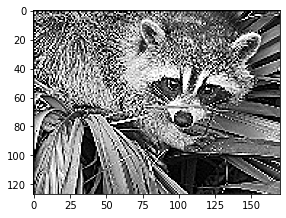

In [17]:
# target = cv2.imread('targets/gray.png')
# cv2.imwrite('targets/median.png',med_face)


plt.subplot(131)
sharp_face = sharpen_image(gray_face)
plt.imshow(sharp_face,cmap='gray',vmin=0,vmax=255)
plt.show()

<br>
<br>

### Problem 6 -  Edge Detection

Edge  detection:  takes in  a  grayscale  image  and  returns a  corresponding  result  that  shows  the  gradient  magnitude  of  the  input.    (You  may  afterward  scale  the  result  for  visibility  if  you  wish when  you  demonstrate  using  the  function.)

In [27]:
def edge_detect(image):
    
    smooth = np.pad(blur_uniform3x3(image), pad_width=1)
    
    kernel_v = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    
    kernel_h = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])
    
    m, n = image.shape
    padded_img_v = np.pad(smooth, pad_width=1)
    
    result_v = np.zeros([m-1, n-1])
    
    for ii in range(1, m-1):
        for jj in range(1, n-1):
            result_v[ii, jj] = np.sum(padded_img_v[ii:ii+3, jj:jj+3]*kernel_v)
            
    padded_img_h = np.pad(smooth, pad_width=1)
    result_h = np.zeros([m-1, n-1])
            
    for ii in range(1, m-1):
        for jj in range(1, n-1):
            result_h[ii, jj] = np.sum(padded_img_h[ii:ii+3, jj:jj+3]*kernel_h)
            
    result_final = result_v + result_h
    
    return result_final

<br>

Now test your code... 

In [28]:
edge_face = edge_detect(gray_face)

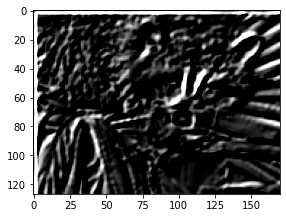

In [29]:
plt.subplot(131)
plt.imshow(edge_face,cmap='gray',vmin=0,vmax=255)
plt.show()